In [1]:
from libsvm.python.libsvm.svmutil import *
import numpy as np
import matplotlib.pyplot as plt
import random 
import math

# Q9

In [22]:
y, x = svm_read_problem('train.txt')

for i in range(len(y)):
    if y[i] == 4:
        y[i] = 1
    else:
        y[i] = -1

C = [0.1, 1, 10]
Q = [2,3,4]

minC = 0.1
minQ = 2
minSV = 1000000

for c in C:
    for q in Q:
        m = svm_train(y, x, f'-t 1 -c {c} -d {q} -q -r 1 -g 1')
        sv = m.get_SV()
        print(f"Number of support vectors = {len(sv)}, C = {c}, Q = {q}")
        if len(sv) < minSV:
            minSV = len(sv)
            minC = c
            minQ = q
        print()

print(f"Minimum number of support vectors = {minSV}, C = {minC}, Q = {minQ}")


Number of support vectors = 860, C = 0.1, Q = 2

Number of support vectors = 789, C = 0.1, Q = 3

Number of support vectors = 740, C = 0.1, Q = 4

Number of support vectors = 783, C = 1, Q = 2

Number of support vectors = 721, C = 1, Q = 3

Number of support vectors = 666, C = 1, Q = 4

Number of support vectors = 712, C = 10, Q = 2

Number of support vectors = 659, C = 10, Q = 3

Number of support vectors = 629, C = 10, Q = 4

Minimum number of support vectors = 629, C = 10, Q = 4


# Q10

In [23]:
y, x = svm_read_problem('train.txt')
y_test, x_test = svm_read_problem('test.t')

for i in range(len(y)):
    if y[i] == 1:
        y[i] = 1
    else:
        y[i] = -1

for i in range(len(y_test)):
    if y_test[i] == 1:
        y_test[i] = 1
    else:
        y_test[i] = -1

gamma = 1
C = [0.01, 0.1, 1, 10, 100]

Eout = 1000000
minC = 0.01


# use gaussian kernel
for c in C:
    m = svm_train(y, x, f'-t 2 -g {gamma} -c {c} -q')
    p_label, p_acc, p_val = svm_predict(y, x, m, '-q')

    # get acc for test set
    p_label, p_acc, p_val = svm_predict(y_test, x_test, m)

    print(f"C = {c}, Eout = {1-p_acc[0]/100}")
    
    if (1-p_acc[0]/100) < Eout:
        Eout = 1-p_acc[0]/100
        minC = c
    print()

print(f"Minimum Eout = {Eout}, C = {minC}")



Accuracy = 95.4% (1908/2000) (classification)
C = 0.01, Eout = 0.04600000000000004

Accuracy = 98.8% (1976/2000) (classification)
C = 0.1, Eout = 0.01200000000000001

Accuracy = 99.5% (1990/2000) (classification)
C = 1, Eout = 0.0050000000000000044

Accuracy = 99.4% (1988/2000) (classification)
C = 10, Eout = 0.005999999999999894

Accuracy = 99.45% (1989/2000) (classification)
C = 100, Eout = 0.005499999999999949

Minimum Eout = 0.0050000000000000044, C = 1


# Q11

In [19]:
def getEval(C, seed):
    y, x = svm_read_problem('train.txt')
    gamma = 1

    for i in range(len(y)):
        if y[i] == 1:
            y[i] = 1
        else:
            y[i] = -1
    
    #  randomly samples 200 examples from the training set for validation and leaves the other examples for training
    random.seed(seed)
    val = random.sample(range(len(y)), 200)
    train = [i for i in range(len(y)) if i not in val]
    
    y_val = [y[i] for i in val]
    x_val = [x[i] for i in val]
    y_train = [y[i] for i in train]
    x_train = [x[i] for i in train]

    m = svm_train(y_train, x_train, f'-t 2 -g {gamma} -c {C} -q')
    p_label, p_acc, p_val = svm_predict(y_val, x_val, m, '-q')
    return 1-p_acc[0]/100

C = [0.01, 0.1, 1, 10, 100]
C_count = {0.01:0, 0.1:0, 1:0, 10:0, 100:0}

for i in range(1000):
    # find the best C for each seed
    bestC = 0.0001
    bestEval = 1000000
    for c in C:
        eval = getEval(c, i)
        if eval < bestEval:
            bestEval = eval
            bestC = c
    print(f"seed = {i}, bestC = {bestC}, bestEval = {bestEval}")
    C_count[bestC] += 1

seed = 0, bestC = 1, bestEval = 0.0050000000000000044
seed = 1, bestC = 10, bestEval = 0.0
seed = 2, bestC = 1, bestEval = 0.020000000000000018
seed = 3, bestC = 10, bestEval = 0.010000000000000009
seed = 4, bestC = 0.1, bestEval = 0.0
seed = 5, bestC = 1, bestEval = 0.0
seed = 6, bestC = 10, bestEval = 0.015000000000000013
seed = 7, bestC = 10, bestEval = 0.010000000000000009
seed = 8, bestC = 10, bestEval = 0.0050000000000000044
seed = 9, bestC = 0.1, bestEval = 0.010000000000000009
seed = 10, bestC = 0.1, bestEval = 0.0050000000000000044
seed = 11, bestC = 1, bestEval = 0.010000000000000009
seed = 12, bestC = 1, bestEval = 0.0050000000000000044
seed = 13, bestC = 10, bestEval = 0.020000000000000018
seed = 14, bestC = 10, bestEval = 0.0050000000000000044
seed = 15, bestC = 10, bestEval = 0.0
seed = 16, bestC = 1, bestEval = 0.020000000000000018
seed = 17, bestC = 10, bestEval = 0.015000000000000013
seed = 18, bestC = 1, bestEval = 0.0
seed = 19, bestC = 1, bestEval = 0.01000000000000

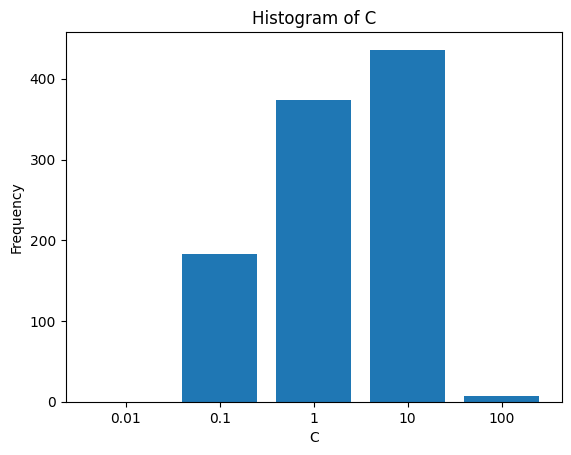

In [20]:
# plot histogram in log scale
plt.bar(range(len(C_count)), list(C_count.values()), align='center')
plt.xticks(range(len(C_count)), list(C_count.keys()))
plt.xlabel('C')
plt.ylabel('Frequency')
plt.title('Histogram of C')
plt.show()

We can see that C = 10 has the highest frequency to have the best Eval.

Secondly, C = 1, then C = 0.1, lastly C = 100.

We know that C limits the value of $ a_n $, when C is low it has higher margin, when C is high it will have lower margin.

This is the trade-off between low training error and low testing error.

We want C to be big enough that it achives good Ein but not overfitting, which results in bad Eval.

In this case that we see when C rises from 0.1, the frequency of each value increases.

Eventually, we reach C = 10, which is the best value of C, having highest frequency of best Eval.

Meaning when we train with C = 10, we have high chance to get both good Ein and Eval.

When we increase C to 100, the Ein might be better, but the model overfitted which result in bad Eval, we can see the frequency dropped significantly.


# Q12

*
optimization finished, #iter = 855
nu = 0.331038
obj = -11.024148, rho = 0.928165
nSV = 1530, nBSV = 1408
Total nSV = 1530
*
optimization finished, #iter = 896
nu = 0.159846
obj = -57.839835, rho = 0.865833
nSV = 941, nBSV = 583
Total nSV = 941
.*
optimization finished, #iter = 1494
nu = 0.095814
obj = -340.554857, rho = 0.723978
nSV = 808, nBSV = 309
Total nSV = 808
..*.*
optimization finished, #iter = 3028
nu = 0.053486
obj = -1674.064450, rho = 0.670259
nSV = 757, nBSV = 124
Total nSV = 757
....*..*
optimization finished, #iter = 6573
nu = 0.016486
obj = -3742.729727, rho = 0.469364
nSV = 748, nBSV = 6
Total nSV = 748
[2.236166833386423, 4.346991552975524, 13.433353645087742, 50.07657031937328, 177.18083214067312]


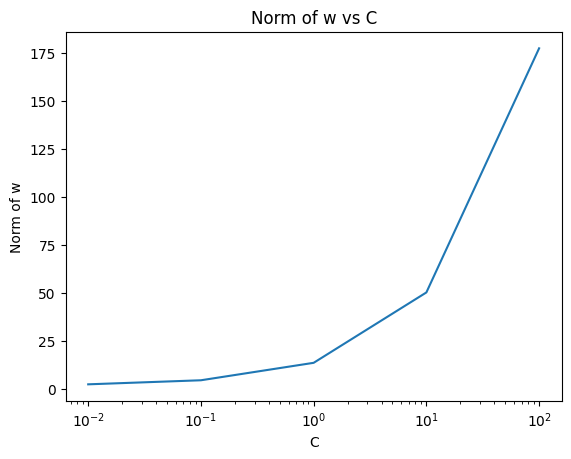

In [6]:
y, x = svm_read_problem('train.txt')

for i in range(len(y)):
    if y[i] == 3:
        y[i] = 1
    else:
        y[i] = -1

for i in range(len(x)):
    for j in range(1,37):
        if j not in x[i].keys():
            x[i][j] = 0

x_list = []
for i in range(len(x)):
    x_list.append(list(x[i].values()))

gamma = 1
C = [0.01, 0.1, 1, 10, 100]

# get norm of w for each c using gaussian kernel
len_list = []

for c in C:
    m = svm_train(y, x, f'-t 2 -g {gamma} -c {c}')
    svcoef = m.get_sv_coef()
    svs = m.get_SV()
    for i in range(len(svs)):
        for j in range(1,37):
            if j not in svs[i].keys():
                svs[i][j] = 0


    support_vectors = []
    for i in range(len(svs)):
        support_vectors.append(list(svs[i].values()))

    # use kernel trick to get norm of w
    w_norm = 0

    for i in range(len(support_vectors)):
        for j in range(len(support_vectors)):
            minus = [support_vectors[i][k] - support_vectors[j][k] for k in range(len(support_vectors[i]))]
            w_norm += svcoef[i][0] * svcoef[j][0] * math.exp(-np.dot(minus, minus))

    len_list.append(np.sqrt(w_norm))


print(len_list)
# plot c to norm of w
plt.plot(C, len_list)
plt.xlabel('C')
plt.ylabel('Norm of w')
plt.xscale('log')
plt.title('Norm of w vs C')
plt.show()

From the plot we can see that the norm of w have a bit of positive correlation to C.

With small |w| results in small C, large |w| results in large C.

Moreover, we know that small C will have larger margin, large C will have small margin.

Hence, we can conclude that large norm |w| will results in small margin, which reduces the Ein, however might cause Eval to be worse if we made it too big.